<h1 style='color:#00868b'>Read, balance and clean dataset<span class="tocSkip"></span></h1>

This notebook produces 6 different CSV files. 

**CSVs**:

There are **3 types CSV files (cp, cps, cpsi)** that each have **2 subtypes**, indicating whether or not the dataset has been balanced or not. In other words, there are **6 CSVs in total** that serve as the starting point for every unsupervised algorithm.

*Imbalanced*
* <code>corpus_sprint2_imbalanced_cp</code>: unbalanced, cleaned dataset consisting of the *consumer complaint narrative* (**c**) and the *product* (**p**).
* <code>corpus_sprint2_imbalanced_cps</code>: unbalanced, cleaned dataset consisting of the *consumer complaint narrative* (**c**), the *product* (**p**) and the *sub-product* (**s**).
* <code>corpus_sprint2_imbalanced_cpsi</code>: unbalanced, cleaned dataset consisting of the *consumer complaint narrative* (**c**), the *product* (**p**), the *sub-product* (**s**) and the *Issue* and *Sub-issue*, combined into one (**i**).

*Balanced*
* <code>corpus_sprint2_balanced_cp</code>: balanced, cleaned dataset consisting of the *consumer complaint narrative* (**c**) and the *product* (**p**).
* <code>corpus_sprint2_balanced_cps</code>: balanced, cleaned dataset consisting of the *consumer complaint narrative* (**c**), the *product* (**p**) and the *sub-product* (**s**).
* <code>corpus_sprint2_balanced_cpsi</code>: balanced, cleaned dataset consisting of the *consumer complaint narrative* (**c**), the *product* (**p**), the *sub-product* (**s**) and the *Issue* and *Sub-issue*, combined into one (**i**).

We have chosen this approach because we are also interested in viewing what the imbalanced dataset yields as a result. A new column is added over time to gauge whether or not it improves the clustering algorithms or not.

# Start

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Read dataset

In [3]:
df = pd.read_csv("complaints-2020-01-22_08_24.csv", encoding="utf-8")

In [4]:
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,07/23/19,"Credit reporting, credit repair services, or o...",Credit reporting,Credit monitoring or identity theft protection...,Problem canceling credit monitoring or identif...,I have complained many times that the credit r...,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,CA,926XX,None,Consent provided,Web,07/23/19,Closed with explanation,Yes,NaN,3315279
1,07/26/19,Debt collection,I do not know,False statements or representation,Attempted to collect wrong amount,please review the current fraud account and al...,Company believes it acted appropriately as aut...,"Ideal Collection Services, Inc.",FL,333XX,None,Consent provided,Web,07/26/19,Closed with explanation,Yes,NaN,3319487
2,06/03/19,Debt collection,I do not know,Attempts to collect debt not owed,Debt was paid,Called multiple times over the years for a deb...,None,"ONEMAIN FINANCIAL HOLDINGS, LLC.",FL,327XX,None,Consent provided,Web,06/07/19,Closed with explanation,Yes,NaN,3262794
3,07/03/19,Debt collection,Other debt,Attempts to collect debt not owed,Debt was result of identity theft,I sent in a letter to the company to have them...,None,"Diversified Consultants, Inc.",VA,232XX,None,Consent provided,Web,07/03/19,Closed with explanation,Yes,NaN,3295208
4,07/14/19,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Received unsolicited financial product or insu...,On XX/XX/19 I applied for a Debt Relief Produc...,None,"ClearOne Advantage, LLC",PA,191XX,"Older American, Servicemember",Consent provided,Web,07/18/19,Closed with explanation,Yes,NaN,3306130


## Select columns to keep

### Consumer complaint narrative + Product (cp)

In [5]:
df_cp = df.loc[:, ('Product', 'Consumer complaint narrative')]

In [6]:
df_cp.head()

,Product,Consumer complaint narrative
0,"Credit reporting, credit repair services, or o...",I have complained many times that the credit r...
1,Debt collection,please review the current fraud account and al...
2,Debt collection,Called multiple times over the years for a deb...
3,Debt collection,I sent in a letter to the company to have them...
4,"Credit reporting, credit repair services, or o...",On XX/XX/19 I applied for a Debt Relief Produc...


### Consumer complaint narrative + Product + Sub-product (cps)

In [7]:
df_cps = df.loc[:, ('Product', 'Sub-product', 'Consumer complaint narrative')]

In [8]:
df_cps.head()

,Product,Sub-product,Consumer complaint narrative
0,"Credit reporting, credit repair services, or o...",Credit reporting,I have complained many times that the credit r...
1,Debt collection,I do not know,please review the current fraud account and al...
2,Debt collection,I do not know,Called multiple times over the years for a deb...
3,Debt collection,Other debt,I sent in a letter to the company to have them...
4,"Credit reporting, credit repair services, or o...",Credit reporting,On XX/XX/19 I applied for a Debt Relief Produc...


### Consumer complaint narrative + Product + Issue + Sub-issue (cpsi)

In [9]:
df_cpsi = df.loc[:, ('Product', 'Sub-product', 'Issue', 'Sub-issue', 'Consumer complaint narrative')]

In [10]:
df_cpsi.head()

,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative
0,"Credit reporting, credit repair services, or o...",Credit reporting,Credit monitoring or identity theft protection...,Problem canceling credit monitoring or identif...,I have complained many times that the credit r...
1,Debt collection,I do not know,False statements or representation,Attempted to collect wrong amount,please review the current fraud account and al...
2,Debt collection,I do not know,Attempts to collect debt not owed,Debt was paid,Called multiple times over the years for a deb...
3,Debt collection,Other debt,Attempts to collect debt not owed,Debt was result of identity theft,I sent in a letter to the company to have them...
4,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Received unsolicited financial product or insu...,On XX/XX/19 I applied for a Debt Relief Produc...


## Data preprocessing

In [11]:
import re
import string

def clean_document(complaint):
    # turn text to lowercase
    complaint = complaint.lower()
    # remove URLs
    complaint = re.sub('https?://(?:[-\w.]|(?:%[\da-fA-F]{2}))+', '', complaint)
    complaint = re.sub('https? ?: ?// ?(?:[-\w.]|(?:%[\da-fA-F]{2}))+', '', complaint)
    # removed censored words
    complaint = re.sub('[xxxx]{4}', '', complaint)
    complaint = re.sub('[XXXX]{4}', '', complaint)
    # remove  non-sensical characters
    complaint = re.sub("[,#'-\(\):$;\?%}{]",' ', complaint)
    complaint = re.sub('\n', '', complaint)
    complaint = re.sub('\t', '', complaint)
    # normalise spaces to just one space
    complaint = re.sub(" +", " ", complaint);
    # remove normal dates and censored dates
    complaint = re.sub('[\dx]{1,2}/[\dx]{1,2}/[\dx]{2,4}', '', complaint)
    #Get sentences from the tokenizer, remove the dot in each.
    return complaint


In [12]:
df_cp["Consumer complaint narrative"] = df_cp["Consumer complaint narrative"].apply(clean_document)
df_cps["Consumer complaint narrative"] = df_cps["Consumer complaint narrative"].apply(clean_document)
df_cpsi["Consumer complaint narrative"] = df_cpsi["Consumer complaint narrative"].apply(clean_document)

In [13]:
# Export to these 3 imbalanced datasets to csv for later use
df_cp.to_csv("corpus_sprint2_imbalanced_cp.csv", index=False)
df_cps.to_csv("corpus_sprint2_imbalanced_cps.csv", index=False)
df_cpsi.to_csv("corpus_sprint2_imbalanced_cpsi.csv", index=False)

## Balancing the dataset

We will now produce 3 more CSV files based on a balanced dataset.

Text(0, 0.5, 'categories')

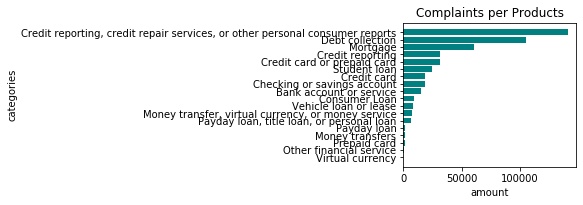

In [14]:
diff_products = df_cp.groupby("Product")["Product"].count().sort_values(ascending=False)
fig = plt.figure()
plt.rcParams['figure.figsize'] = [30,15]
ax = fig.add_axes([0,0,0.4,0.5])

ax.barh(diff_products.index,diff_products,color='teal')
ax.invert_yaxis()
plt.title('Complaints per Products')
plt.xlabel('amount')
plt.ylabel('categories')

Produce 3 dataframes that will contain the balanced dataset:

In [15]:
df_cp_balanced1 = df_cp.copy()
df_cps_balanced1 = df_cps.copy()
df_cpsi_balanced1 = df_cpsi.copy()

### Remove columns with the least complaints

#### Balancing round 1

In [16]:
df_cp_balanced1 = df_cp_balanced1[df_cp_balanced1["Product"] != "Virtual currency"]
df_cp_balanced1 = df_cp_balanced1[df_cp_balanced1["Product"] != "Other financial service"]
df_cp_balanced1 = df_cp_balanced1[df_cp_balanced1["Product"] != "Prepaid card"]
df_cp_balanced1 = df_cp_balanced1[df_cp_balanced1["Product"] != "Money transfers"]
df_cp_balanced1 = df_cp_balanced1[df_cp_balanced1["Product"] != "Payday loan"]

df_cps_balanced1 = df_cps_balanced1[df_cps_balanced1["Product"] != "Virtual currency"]
df_cps_balanced1 = df_cps_balanced1[df_cps_balanced1["Product"] != "Other financial service"]
df_cps_balanced1 = df_cps_balanced1[df_cps_balanced1["Product"] != "Prepaid card"]
df_cps_balanced1 = df_cps_balanced1[df_cps_balanced1["Product"] != "Money transfers"]
df_cps_balanced1 = df_cps_balanced1[df_cps_balanced1["Product"] != "Payday loan"]

df_cpsi_balanced1 = df_cpsi_balanced1[df_cpsi_balanced1["Product"] != "Virtual currency"]
df_cpsi_balanced1 = df_cpsi_balanced1[df_cpsi_balanced1["Product"] != "Other financial service"]
df_cpsi_balanced1 = df_cpsi_balanced1[df_cpsi_balanced1["Product"] != "Prepaid card"]
df_cpsi_balanced1 = df_cpsi_balanced1[df_cpsi_balanced1["Product"] != "Money transfers"]
df_cpsi_balanced1 = df_cpsi_balanced1[df_cpsi_balanced1["Product"] != "Payday loan"]

### Make a copy and iteratively drop the products with the most complaints, adding a random sample % of them back afterwards

#### Balancing round 2

In [17]:
df_cp_balanced2 = df_cp_balanced1.copy()
df_cps_balanced2 = df_cps_balanced1.copy()
df_cpsi_balanced2 = df_cpsi_balanced1.copy()

In [18]:
indexNames = df_cp_balanced2[df_cp_balanced2["Product"] == "Mortgage"].index
df_cp_balanced2.drop(indexNames, inplace=True)
indexNames = df_cp_balanced2[df_cp_balanced2["Product"] == "Debt collection"].index
df_cp_balanced2.drop(indexNames, inplace=True)
indexNames = df_cp_balanced2[df_cp_balanced2["Product"] == "Credit reporting, credit repair services, or other personal consumer reports"].index
df_cp_balanced2.drop(indexNames, inplace=True)

indexNames = df_cps_balanced2[df_cps_balanced2["Product"] == "Mortgage"].index
df_cps_balanced2.drop(indexNames, inplace=True)
indexNames = df_cps_balanced2[df_cps_balanced2["Product"] == "Debt collection"].index
df_cps_balanced2.drop(indexNames, inplace=True)
indexNames = df_cps_balanced2[df_cps_balanced2["Product"] == "Credit reporting, credit repair services, or other personal consumer reports"].index
df_cps_balanced2.drop(indexNames, inplace=True)

indexNames = df_cpsi_balanced2[df_cpsi_balanced2["Product"] == "Mortgage"].index
df_cpsi_balanced2.drop(indexNames, inplace=True)
indexNames = df_cpsi_balanced2[df_cpsi_balanced2["Product"] == "Debt collection"].index
df_cpsi_balanced2.drop(indexNames, inplace=True)
indexNames = df_cpsi_balanced2[df_cpsi_balanced2["Product"] == "Credit reporting, credit repair services, or other personal consumer reports"].index
df_cpsi_balanced2.drop(indexNames, inplace=True)

In [19]:
df_cp_balanced2 = df_cp_balanced2.append(df_cp_balanced1.loc[df_cp_balanced1["Product"] == 'Mortgage'].sample(frac=0.5))
df_cp_balanced2 = df_cp_balanced2.append(df_cp_balanced1.loc[df_cp_balanced1["Product"] == 'Debt collection'].sample(frac=0.4))
df_cp_balanced2 = df_cp_balanced2.append(df_cp_balanced1.loc[df_cp_balanced1["Product"] == 'Credit reporting, credit repair services, or other personal consumer reports'].sample(frac=0.3))

df_cps_balanced2 = df_cps_balanced2.append(df_cps_balanced1.loc[df_cps_balanced1["Product"] == 'Mortgage'].sample(frac=0.5))
df_cps_balanced2 = df_cps_balanced2.append(df_cps_balanced1.loc[df_cps_balanced1["Product"] == 'Debt collection'].sample(frac=0.4))
df_cps_balanced2 = df_cps_balanced2.append(df_cps_balanced1.loc[df_cps_balanced1["Product"] == 'Credit reporting, credit repair services, or other personal consumer reports'].sample(frac=0.3))

df_cpsi_balanced2 = df_cpsi_balanced2.append(df_cpsi_balanced1.loc[df_cpsi_balanced1["Product"] == 'Mortgage'].sample(frac=0.5))
df_cpsi_balanced2 = df_cpsi_balanced2.append(df_cpsi_balanced1.loc[df_cpsi_balanced1["Product"] == 'Debt collection'].sample(frac=0.4))
df_cpsi_balanced2 = df_cpsi_balanced2.append(df_cpsi_balanced1.loc[df_cpsi_balanced1["Product"] == 'Credit reporting, credit repair services, or other personal consumer reports'].sample(frac=0.3))

Text(0, 0.5, 'categories')

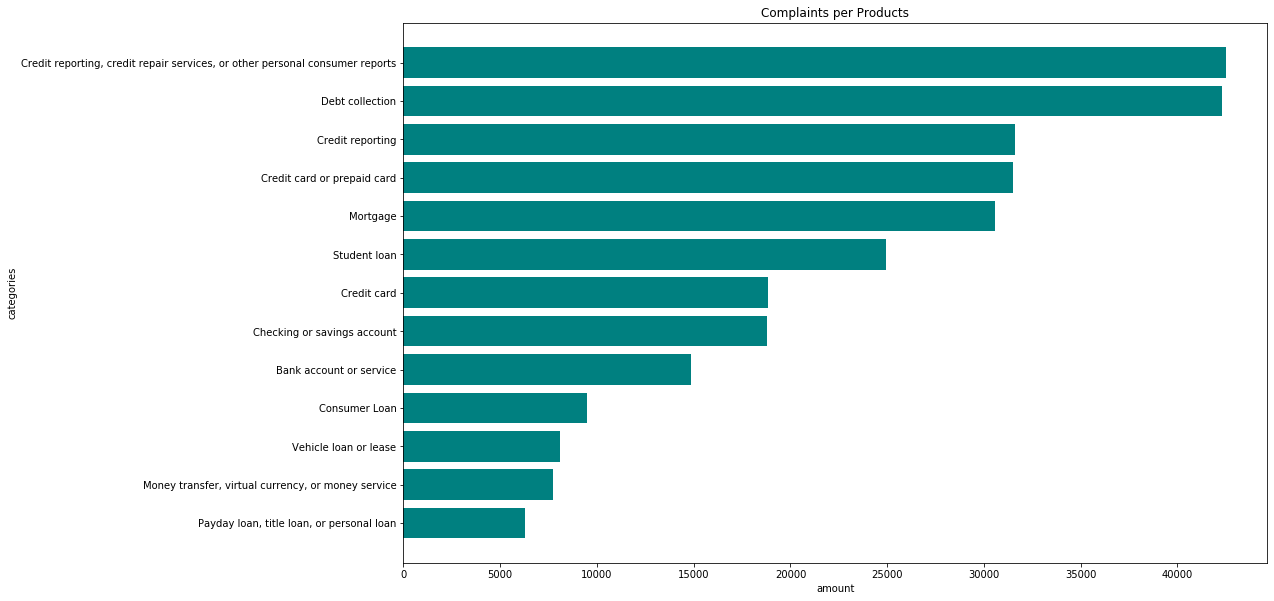

In [20]:
diff_products = df_cp_balanced2.groupby("Product")["Product"].count().sort_values(ascending=False)
fig = plt.figure()
plt.rcParams['figure.figsize'] = [30,15]
ax = fig.add_axes([0,0,0.4,0.5])

ax.barh(diff_products.index,diff_products,color='teal')
ax.invert_yaxis()
plt.title('Complaints per Products')
plt.xlabel('amount')
plt.ylabel('categories')

#### Balancing round 3

In [21]:
df_cp_balanced3 = df_cp_balanced2.copy()
df_cps_balanced3 = df_cps_balanced2.copy()
df_cpsi_balanced3 = df_cpsi_balanced2.copy()

In [22]:
indexNames = df_cp_balanced3[df_cp_balanced3["Product"] == "Credit reporting, credit repair services, or other personal consumer reports"].index
df_cp_balanced3.drop(indexNames, inplace=True)
indexNames = df_cp_balanced3[df_cp_balanced3["Product"] == "Debt collection"].index
df_cp_balanced3.drop(indexNames, inplace=True)
indexNames = df_cp_balanced3[df_cp_balanced3["Product"] == "Credit reporting"].index
df_cp_balanced3.drop(indexNames, inplace=True)
indexNames = df_cp_balanced3[df_cp_balanced3["Product"] == "Credit card or prepaid card"].index
df_cp_balanced3.drop(indexNames, inplace=True)
indexNames = df_cp_balanced3[df_cp_balanced3["Product"] == "Mortgage"].index
df_cp_balanced3.drop(indexNames, inplace=True)
indexNames = df_cp_balanced3[df_cp_balanced3["Product"] == "Student loan"].index
df_cp_balanced3.drop(indexNames, inplace=True)

indexNames = df_cps_balanced3[df_cps_balanced3["Product"] == "Credit reporting, credit repair services, or other personal consumer reports"].index
df_cps_balanced3.drop(indexNames, inplace=True)
indexNames = df_cps_balanced3[df_cps_balanced3["Product"] == "Debt collection"].index
df_cps_balanced3.drop(indexNames, inplace=True)
indexNames = df_cps_balanced3[df_cps_balanced3["Product"] == "Credit reporting"].index
df_cps_balanced3.drop(indexNames, inplace=True)
indexNames = df_cps_balanced3[df_cps_balanced3["Product"] == "Credit card or prepaid card"].index
df_cps_balanced3.drop(indexNames, inplace=True)
indexNames = df_cps_balanced3[df_cps_balanced3["Product"] == "Mortgage"].index
df_cps_balanced3.drop(indexNames, inplace=True)
indexNames = df_cps_balanced3[df_cps_balanced3["Product"] == "Student loan"].index
df_cps_balanced3.drop(indexNames, inplace=True)

indexNames = df_cpsi_balanced3[df_cpsi_balanced3["Product"] == "Credit reporting, credit repair services, or other personal consumer reports"].index
df_cpsi_balanced3.drop(indexNames, inplace=True)
indexNames = df_cpsi_balanced3[df_cpsi_balanced3["Product"] == "Debt collection"].index
df_cpsi_balanced3.drop(indexNames, inplace=True)
indexNames = df_cpsi_balanced3[df_cpsi_balanced3["Product"] == "Credit reporting"].index
df_cpsi_balanced3.drop(indexNames, inplace=True)
indexNames = df_cpsi_balanced3[df_cpsi_balanced3["Product"] == "Credit card or prepaid card"].index
df_cpsi_balanced3.drop(indexNames, inplace=True)
indexNames = df_cpsi_balanced3[df_cpsi_balanced3["Product"] == "Mortgage"].index
df_cpsi_balanced3.drop(indexNames, inplace=True)
indexNames = df_cpsi_balanced3[df_cpsi_balanced3["Product"] == "Student loan"].index
df_cpsi_balanced3.drop(indexNames, inplace=True)

In [23]:
df_cp_balanced3 = df_cp_balanced3.append(df_cp_balanced2.loc[df_cp_balanced2["Product"] == 'Credit reporting, credit repair services, or other personal consumer reports'].sample(frac=0.5))
df_cp_balanced3 = df_cp_balanced3.append(df_cp_balanced2.loc[df_cp_balanced2["Product"] == 'Debt collection'].sample(frac=0.5))
df_cp_balanced3 = df_cp_balanced3.append(df_cp_balanced2.loc[df_cp_balanced2["Product"] == 'Credit reporting'].sample(frac=0.6))
df_cp_balanced3 = df_cp_balanced3.append(df_cp_balanced2.loc[df_cp_balanced2["Product"] == 'Credit card or prepaid card'].sample(frac=0.6))
df_cp_balanced3 = df_cp_balanced3.append(df_cp_balanced2.loc[df_cp_balanced2["Product"] == 'Mortgage'].sample(frac=0.6))
df_cp_balanced3 = df_cp_balanced3.append(df_cp_balanced2.loc[df_cp_balanced2["Product"] == 'Student loan'].sample(frac=0.85))

df_cps_balanced3 = df_cps_balanced3.append(df_cps_balanced2.loc[df_cps_balanced2["Product"] == 'Credit reporting, credit repair services, or other personal consumer reports'].sample(frac=0.5))
df_cps_balanced3 = df_cps_balanced3.append(df_cps_balanced2.loc[df_cps_balanced2["Product"] == 'Debt collection'].sample(frac=0.5))
df_cps_balanced3 = df_cps_balanced3.append(df_cps_balanced2.loc[df_cps_balanced2["Product"] == 'Credit reporting'].sample(frac=0.6))
df_cps_balanced3 = df_cps_balanced3.append(df_cps_balanced2.loc[df_cps_balanced2["Product"] == 'Credit card or prepaid card'].sample(frac=0.6))
df_cps_balanced3 = df_cps_balanced3.append(df_cps_balanced2.loc[df_cps_balanced2["Product"] == 'Mortgage'].sample(frac=0.6))
df_cps_balanced3 = df_cps_balanced3.append(df_cps_balanced2.loc[df_cps_balanced2["Product"] == 'Student loan'].sample(frac=0.85))

df_cpsi_balanced3 = df_cpsi_balanced3.append(df_cpsi_balanced2.loc[df_cpsi_balanced2["Product"] == 'Credit reporting, credit repair services, or other personal consumer reports'].sample(frac=0.5))
df_cpsi_balanced3 = df_cpsi_balanced3.append(df_cpsi_balanced2.loc[df_cpsi_balanced2["Product"] == 'Debt collection'].sample(frac=0.5))
df_cpsi_balanced3 = df_cpsi_balanced3.append(df_cpsi_balanced2.loc[df_cpsi_balanced2["Product"] == 'Credit reporting'].sample(frac=0.6))
df_cpsi_balanced3 = df_cpsi_balanced3.append(df_cpsi_balanced2.loc[df_cpsi_balanced2["Product"] == 'Credit card or prepaid card'].sample(frac=0.6))
df_cpsi_balanced3 = df_cpsi_balanced3.append(df_cpsi_balanced2.loc[df_cpsi_balanced2["Product"] == 'Mortgage'].sample(frac=0.6))
df_cpsi_balanced3 = df_cpsi_balanced3.append(df_cpsi_balanced2.loc[df_cpsi_balanced2["Product"] == 'Student loan'].sample(frac=0.85))

Text(0, 0.5, 'categories')

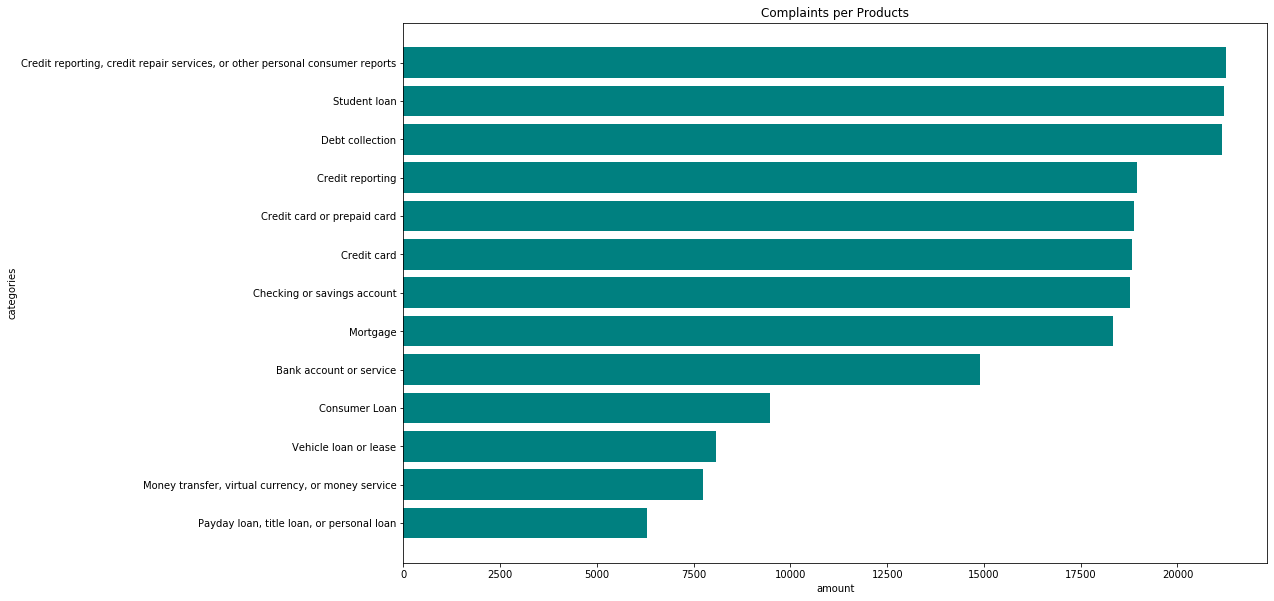

In [24]:
diff_products = df_cp_balanced3.groupby("Product")["Product"].count().sort_values(ascending=False)
fig = plt.figure()
plt.rcParams['figure.figsize'] = [30,15]
ax = fig.add_axes([0,0,0.4,0.5])

ax.barh(diff_products.index,diff_products,color='teal')
ax.invert_yaxis()
plt.title('Complaints per Products')
plt.xlabel('amount')
plt.ylabel('categories')

#### Balancing round 4

In [25]:
df_cp_balanced4 = df_cp_balanced3.copy()
df_cps_balanced4 = df_cps_balanced3.copy()
df_cpsi_balanced4 = df_cpsi_balanced3.copy()

In [26]:
indexNames = df_cp_balanced4[df_cp_balanced4["Product"] == "Credit reporting, credit repair services, or other personal consumer reports"].index
df_cp_balanced4.drop(indexNames, inplace=True)
indexNames = df_cp_balanced4[df_cp_balanced4["Product"] == "Debt collection"].index
df_cp_balanced4.drop(indexNames, inplace=True)
indexNames = df_cp_balanced4[df_cp_balanced4["Product"] == "Credit reporting"].index
df_cp_balanced4.drop(indexNames, inplace=True)
indexNames = df_cp_balanced4[df_cp_balanced4["Product"] == "Credit card or prepaid card"].index
df_cp_balanced4.drop(indexNames, inplace=True)
indexNames = df_cp_balanced4[df_cp_balanced4["Product"] == "Mortgage"].index
df_cp_balanced4.drop(indexNames, inplace=True)
indexNames = df_cp_balanced4[df_cp_balanced4["Product"] == "Student loan"].index
df_cp_balanced4.drop(indexNames, inplace=True)
indexNames = df_cp_balanced4[df_cp_balanced4["Product"] == "Credit card"].index
df_cp_balanced4.drop(indexNames, inplace=True)
indexNames = df_cp_balanced4[df_cp_balanced4["Product"] == "Checking or savings account"].index
df_cp_balanced4.drop(indexNames, inplace=True)
indexNames = df_cp_balanced4[df_cp_balanced4["Product"] == "Bank account or service"].index
df_cp_balanced4.drop(indexNames, inplace=True)

indexNames = df_cps_balanced4[df_cps_balanced4["Product"] == "Credit reporting, credit repair services, or other personal consumer reports"].index
df_cps_balanced4.drop(indexNames, inplace=True)
indexNames = df_cps_balanced4[df_cps_balanced4["Product"] == "Debt collection"].index
df_cps_balanced4.drop(indexNames, inplace=True)
indexNames = df_cps_balanced4[df_cps_balanced4["Product"] == "Credit reporting"].index
df_cps_balanced4.drop(indexNames, inplace=True)
indexNames = df_cps_balanced4[df_cps_balanced4["Product"] == "Credit card or prepaid card"].index
df_cps_balanced4.drop(indexNames, inplace=True)
indexNames = df_cps_balanced4[df_cps_balanced4["Product"] == "Mortgage"].index
df_cps_balanced4.drop(indexNames, inplace=True)
indexNames = df_cps_balanced4[df_cps_balanced4["Product"] == "Student loan"].index
df_cps_balanced4.drop(indexNames, inplace=True)
indexNames = df_cps_balanced4[df_cps_balanced4["Product"] == "Credit card"].index
df_cps_balanced4.drop(indexNames, inplace=True)
indexNames = df_cps_balanced4[df_cps_balanced4["Product"] == "Checking or savings account"].index
df_cps_balanced4.drop(indexNames, inplace=True)
indexNames = df_cps_balanced4[df_cps_balanced4["Product"] == "Bank account or service"].index
df_cps_balanced4.drop(indexNames, inplace=True)

indexNames = df_cpsi_balanced4[df_cpsi_balanced4["Product"] == "Credit reporting, credit repair services, or other personal consumer reports"].index
df_cpsi_balanced4.drop(indexNames, inplace=True)
indexNames = df_cpsi_balanced4[df_cpsi_balanced4["Product"] == "Debt collection"].index
df_cpsi_balanced4.drop(indexNames, inplace=True)
indexNames = df_cpsi_balanced4[df_cpsi_balanced4["Product"] == "Credit reporting"].index
df_cpsi_balanced4.drop(indexNames, inplace=True)
indexNames = df_cpsi_balanced4[df_cpsi_balanced4["Product"] == "Credit card or prepaid card"].index
df_cpsi_balanced4.drop(indexNames, inplace=True)
indexNames = df_cpsi_balanced4[df_cpsi_balanced4["Product"] == "Mortgage"].index
df_cpsi_balanced4.drop(indexNames, inplace=True)
indexNames = df_cpsi_balanced4[df_cpsi_balanced4["Product"] == "Student loan"].index
df_cpsi_balanced4.drop(indexNames, inplace=True)
indexNames = df_cpsi_balanced4[df_cpsi_balanced4["Product"] == "Credit card"].index
df_cpsi_balanced4.drop(indexNames, inplace=True)
indexNames = df_cpsi_balanced4[df_cpsi_balanced4["Product"] == "Checking or savings account"].index
df_cpsi_balanced4.drop(indexNames, inplace=True)
indexNames = df_cpsi_balanced4[df_cpsi_balanced4["Product"] == "Bank account or service"].index
df_cpsi_balanced4.drop(indexNames, inplace=True)

In [27]:
df_cp_balanced4 = df_cp_balanced4.append(df_cp_balanced3.loc[df_cp_balanced3["Product"] == 'Credit reporting, credit repair services, or other personal consumer reports'].sample(frac=0.44))
df_cp_balanced4 = df_cp_balanced4.append(df_cp_balanced3.loc[df_cp_balanced3["Product"] == 'Debt collection'].sample(frac=0.44))
df_cp_balanced4 = df_cp_balanced4.append(df_cp_balanced3.loc[df_cp_balanced3["Product"] == 'Credit reporting'].sample(frac=0.46))
df_cp_balanced4 = df_cp_balanced4.append(df_cp_balanced3.loc[df_cp_balanced3["Product"] == 'Credit card or prepaid card'].sample(frac=0.44))
df_cp_balanced4 = df_cp_balanced4.append(df_cp_balanced3.loc[df_cp_balanced3["Product"] == 'Mortgage'].sample(frac=0.45))
df_cp_balanced4 = df_cp_balanced4.append(df_cp_balanced3.loc[df_cp_balanced3["Product"] == 'Student loan'].sample(frac=0.43))
df_cp_balanced4 = df_cp_balanced4.append(df_cp_balanced3.loc[df_cp_balanced3["Product"] == 'Credit card'].sample(frac=0.5))
df_cp_balanced4 = df_cp_balanced4.append(df_cp_balanced3.loc[df_cp_balanced3["Product"] == 'Checking or savings account'].sample(frac=0.46))
df_cp_balanced4 = df_cp_balanced4.append(df_cp_balanced3.loc[df_cp_balanced3["Product"] == 'Bank account or service'].sample(frac=0.6))

df_cps_balanced4 = df_cps_balanced4.append(df_cps_balanced3.loc[df_cps_balanced3["Product"] == 'Credit reporting, credit repair services, or other personal consumer reports'].sample(frac=0.44))
df_cps_balanced4 = df_cps_balanced4.append(df_cps_balanced3.loc[df_cps_balanced3["Product"] == 'Debt collection'].sample(frac=0.44))
df_cps_balanced4 = df_cps_balanced4.append(df_cps_balanced3.loc[df_cps_balanced3["Product"] == 'Credit reporting'].sample(frac=0.46))
df_cps_balanced4 = df_cps_balanced4.append(df_cps_balanced3.loc[df_cps_balanced3["Product"] == 'Credit card or prepaid card'].sample(frac=0.44))
df_cps_balanced4 = df_cps_balanced4.append(df_cps_balanced3.loc[df_cps_balanced3["Product"] == 'Mortgage'].sample(frac=0.45))
df_cps_balanced4 = df_cps_balanced4.append(df_cps_balanced3.loc[df_cps_balanced3["Product"] == 'Student loan'].sample(frac=0.43))
df_cps_balanced4 = df_cps_balanced4.append(df_cps_balanced3.loc[df_cps_balanced3["Product"] == 'Credit card'].sample(frac=0.5))
df_cps_balanced4 = df_cps_balanced4.append(df_cps_balanced3.loc[df_cps_balanced3["Product"] == 'Checking or savings account'].sample(frac=0.46))
df_cps_balanced4 = df_cps_balanced4.append(df_cps_balanced3.loc[df_cps_balanced3["Product"] == 'Bank account or service'].sample(frac=0.6))

df_cpsi_balanced4 = df_cpsi_balanced4.append(df_cpsi_balanced3.loc[df_cpsi_balanced3["Product"] == 'Credit reporting, credit repair services, or other personal consumer reports'].sample(frac=0.44))
df_cpsi_balanced4 = df_cpsi_balanced4.append(df_cpsi_balanced3.loc[df_cpsi_balanced3["Product"] == 'Debt collection'].sample(frac=0.44))
df_cpsi_balanced4 = df_cpsi_balanced4.append(df_cpsi_balanced3.loc[df_cpsi_balanced3["Product"] == 'Credit reporting'].sample(frac=0.46))
df_cpsi_balanced4 = df_cpsi_balanced4.append(df_cpsi_balanced3.loc[df_cpsi_balanced3["Product"] == 'Credit card or prepaid card'].sample(frac=0.44))
df_cpsi_balanced4 = df_cpsi_balanced4.append(df_cpsi_balanced3.loc[df_cpsi_balanced3["Product"] == 'Mortgage'].sample(frac=0.45))
df_cpsi_balanced4 = df_cpsi_balanced4.append(df_cpsi_balanced3.loc[df_cpsi_balanced3["Product"] == 'Student loan'].sample(frac=0.43))
df_cpsi_balanced4 = df_cpsi_balanced4.append(df_cpsi_balanced3.loc[df_cpsi_balanced3["Product"] == 'Credit card'].sample(frac=0.5))
df_cpsi_balanced4 = df_cpsi_balanced4.append(df_cpsi_balanced3.loc[df_cpsi_balanced3["Product"] == 'Checking or savings account'].sample(frac=0.46))
df_cpsi_balanced4 = df_cpsi_balanced4.append(df_cpsi_balanced3.loc[df_cpsi_balanced3["Product"] == 'Bank account or service'].sample(frac=0.6))

Text(0, 0.5, 'categories')

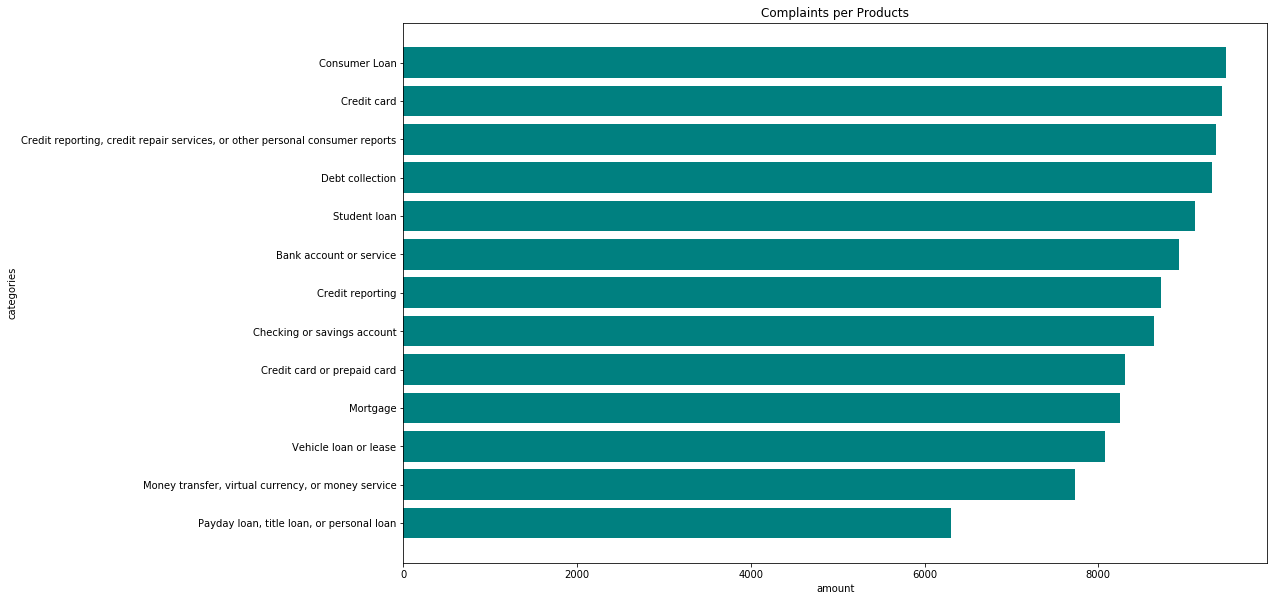

In [28]:
diff_products = df_cp_balanced4.groupby("Product")["Product"].count().sort_values(ascending=False)
fig = plt.figure()
plt.rcParams['figure.figsize'] = [30,15]
ax = fig.add_axes([0,0,0.4,0.5])

ax.barh(diff_products.index,diff_products,color='teal')
ax.invert_yaxis()
plt.title('Complaints per Products')
plt.xlabel('amount')
plt.ylabel('categories')

In [29]:
# Export to these 3 more balanced datasets to csv for later use
df_cp_balanced4.to_csv("corpus_sprint2_balanced_cp.csv", index=False)
df_cps_balanced4.to_csv("corpus_sprint2_balanced_cps.csv", index=False)
df_cpsi_balanced4.to_csv("corpus_sprint2_balanced_cpsi.csv", index=False)